## *Maryam Mounad - Muhammad Humza Arain - Mahak Nadeem*

# Exercise 1 – Clustering Algorithms (15P)

**Theoretical questions**
# 1.
# K-Means (5P) 

**a) What are the advantages of k-means? (1P)** 

K-means is conceptually straightforward: assign points to the nearest centroid and then update centroids by averaging.Because each iteration requires only distance calculations and simple averaging, K-means scales well both in the number of samples and features Unlike some clustering methods that rely on probabilistic assignments (e.g., Gaussian Mixture Models), K-means’ hard assignments and straightforward centroid updates give consistent, reproducible results (aside from random initialization)

**b) Limitations of K-Means**

**i) How can you counteract that K-Means depends on the initial conditions?** 

Counter meausre: Run the algorithm multiple times with different random starts (or use smart seeding like k-means++) and pick the best outcome (lowest total within-cluster variance).

**ii) Why is K-Means not optimal if you have class overlap?**

Because K-Means partitions space by straight-line (Voronoi) boundaries around centroids, it will misassign points when true classes overlap in feature space—means can’t capture mixed or non-spherical distributions.
In overlap regions, distance alone isn’t a reliable proxy for class membership, so K-Means can’t optimally separate the data.

**iii) Consider this dataset. Why would K-Means have problems detecting the classes?**

K-Means partitions data using Voronoi cells (linear/hyperplane boundaries). However, the true separation between the inner and outer classes is radial (based on distance from the center). K-Means cannot model such non-linear, spherical boundaries.Even though both clusters themselves are “spherical,” K-Means’ flat boundaries will inevitably slice off portions of the inner sphere or accidentally include pockets of outer‐sphere points in the “inner” cluster.Kernel K-Means (e.g. with an RBF kernel) lifts the data into a feature space where concentric shells become linearly separable.

**iv) Consider this dataset. Why would K-Means have problems detecting classes? Which other algorithm would be better to use in this case**

K-Means fails due to its bias toward large, dense clusters and inability to handle severe size imbalances. clusters are assumed to be Gaussian, but this still struggles with severe size imbalances.




# 2. 
# GMM for Classification (5P)

**a) Explain the EM-Algorithm in your own words, without using any formula. Why do we need this algorithm and how does it work?** 


We use the EM (Expectation–Maximization) algorithm whenever we want to fit a model that depends on hidden or missing information (for example, which cluster each point really belongs to, or the “true” values behind noisy observations).

How it works:

Guess the unknowns (Expectation step): Start with a guess for your model’s parameters (e.g. where clusters are) and use them to estimate the missing pieces—like how likely it is that each data point belongs to each cluster.

Improve the guess (Maximization step): Pretend those estimated assignments are real, then adjust the model’s parameters to fit them better (e.g. move cluster centers to suit the current assignments).

Repeat: Go back and forth—re-estimate assignments, then re-estimate parameters—until things settle down and you can’t improve the fit anymore.

By alternating between “fill in the blanks” and “refine the model,” EM finds a good solution even when you can’t directly observe all the pieces you need.

**b) Describe how to avoid the problem of getting stuck in local minima when using the EM algorithm. Write a pseudo-algorithm (no coding needed) to describe how to find the best set of clusters AND to reduce the local minima problem.**


Multiple Random Restarts
Run EM from many different starting points (R ≥ 10 or more) and pick the fit with the highest final log-likelihood.

Smart Initialization
Seeding with K-means or a small-variance “overfit” mixture helps you start closer to good modes of the likelihood surface.

Optional Annealing / Split-Merge

Deterministic annealing: begin with a “flattened” (high-entropy) version of the model and gradually sharpen it to the true likelihood.

Split–merge moves: occasionally split a poorly fit cluster or merge two similar ones, then continue EM—this lets you escape shallow basins.


# Pseudo code

```pseudocode
# Robust EM Algorithm with Multiple Restarts

Input: 
    data X  
    clusters K  
    restarts R  
    threshold ε  

best_loglik <- infinity  
best_model  <- null  

for r = 1 to R do
    Initialize θ⁰
        Option 1: use K-means to get initial centers
        Option 2: random mixture parameters

  repeat
      E-step:  
        Compute responsibilities qᵢₖ = P(Zᵢ=k | Xᵢ, θ)
      M-step:  
        Update θ <- argmax E₍q₎[log P(X, Z | θ)]
        Compute L <- log P(X | θ)
  until change in L < ε

  if L > best_loglik then
    best_loglik <- L
    best_model  <- θ
  end if
end for

Output: best_model





**c) The complexity of the GMM can be controlled by restricting how the  covariance matrices are allowed to vary. Assume your data has p features  and you want to cluster it into k clusters. (3P each one 1P)**

**i) How many parameters (depending on the number of clusters) need to be estimated in the most general model (no restrictions on the covariances)**

For a fully unconstrained Gaussian mixture you must estimate 

k * p + k * (p(p+1)/2) + (k-1)

**ii) Assume there is no correlation between the variables for each Gaussian. How many parameters does this model need to estimate**

k * p+ k * p+(k−1)  = 2kp+k−1

**iii) Assume there is neither correlation nor does the variation for each feature change. How many parameters does the model have to estimate now?**

kp+k+(k−1) = kp+2k−1

# 3. Consensus clustering and Non-Negative Matrix Factorization (5P)

a. Consensus clustering is used to address statistical instability in clustering.
Briefly explain, in your own words, the steps of implementing consensus
clustering to a dataset using any clustering method, and how it addresses
statistical instability in clustering. (2P).

Steps of implementing consensus clustering to adatasets:
1. Random Sampling of Data Points:
Randomly select a portion (e.g., 80%) of the data without replacement. This ensures that each run is slightly different, which helps test the stability of the clustering.

2. (Optional) Random Sampling of Features:
You can also randomly choose a subset of the features (columns). This helps check whether clusters are stable under different perspectives of the data.

3. Apply Clustering Algorithm:
Use a base clustering method (like K-Means or Hierarchical Clustering) on the sampled data to generate clusters.

4. Repeat the Process (H Times):
Run steps 1–3 many times (e.g., 100 or more) to get a variety of clustering results across different samples.

Clustering can be unstable due to randomness, noise, or sensitivity to initial conditions. By running clustering multiple times on different subsamples, consensus clustering filters out noise, highlights consistent patterns and produces more reliable, repeatable clusters

This makes it especially useful in high-dimensional or noisy data (like gene expression or image data).

b. What is the main constraint of applying non-negative matrix factorization
(NMF) as a clustering technique? How does the algorithm work when used for
clustering data? (1P).

Non-negative Matrix Factorization (NMF) can only be applied to data where all values are non-negative. This means the dataset must not contain any negative numbers — which can be a limitation, especially if the data was standardized or includes centered values.
How NMF Clusters Data:
NMF decomposes the data matrix 𝑋 into two non-negative matrices 𝑊 and 𝐻, such that:

$$ 𝑋≈𝑊⋅𝐻$$

Each row of 𝑊 represents how strongly a data point is associated with each cluster.

Clustering is done by assigning each point to the cluster with the highest weight in its corresponding row of 𝑊.

This way, NMF reveals hidden structure in the data — but it assumes that this structure can be captured through additive, linear combinations, which limits its flexibility for more complex patterns.



c. What are the advantages and drawbacks of NMF? (1P).

Advantages of NMF for Clustering:


1. Does feature selection and clustering at the same time: It can find groups of samples and figure out which features matter for those groups (this is called biclustering).

2. Not based on distance: It doesn’t rely on measuring distances between points, so it can work better when distance isn’t a good measure of similarity.

Disadvantages of NMF for Clustering:
1. Only finds clusters that are linearly separable: It works well only when the groups can be separated by straight lines or flat boundaries, not more complex shapes.

2. Computationally demanding: It can take a lot of time and computer power to run, especially with big or complicated data.




d. How does one choose the appropriate number of clusters for a model based
on silhouette index? (1P).

To pick the right number of clusters using the silhouette index, one should try different numbers of clusters and calculate the silhouette score for each. The silhouette score basically tells you how well the data points fit within their own cluster compared to other clusters. You then choose the number of clusters that gives you the highest silhouette score, because that means the clusters are the clearest and most meaningful.



# Exercise 2 – Programming task (10P)

Load the iris dataset from sklearn
Please use the random_seed = 2782 for all the questions.


1. Apply K-Means to the iris dataset with different K values i.e. 2-6. Do the following
questions for all the different clusters. (3P)

a. For each clustering, plot the cluster assignment and color-code accordingly
within a scatter plot for the features “petal width” and “petal length”.

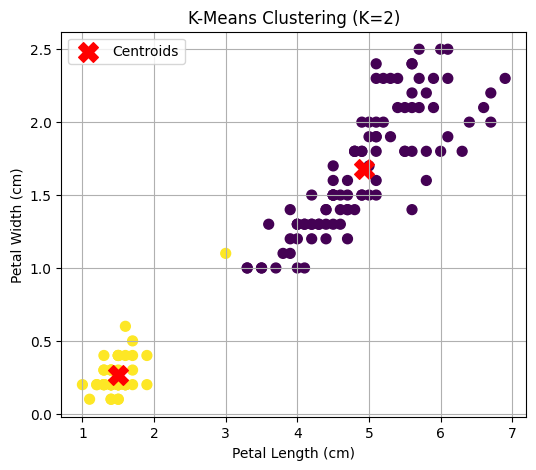

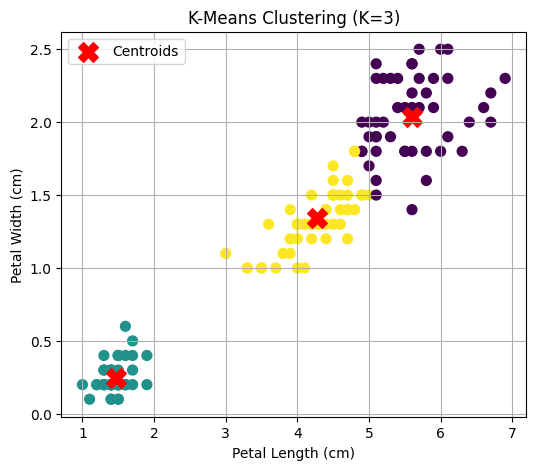

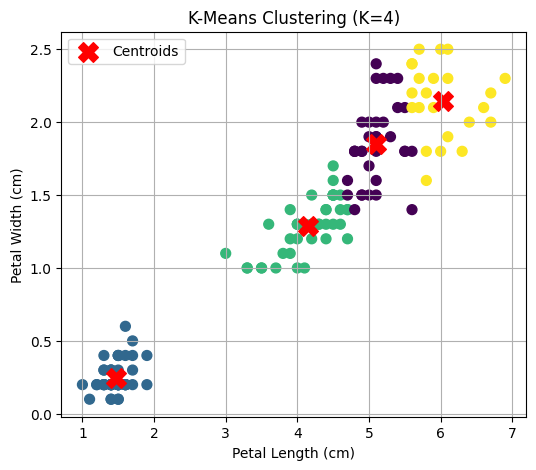

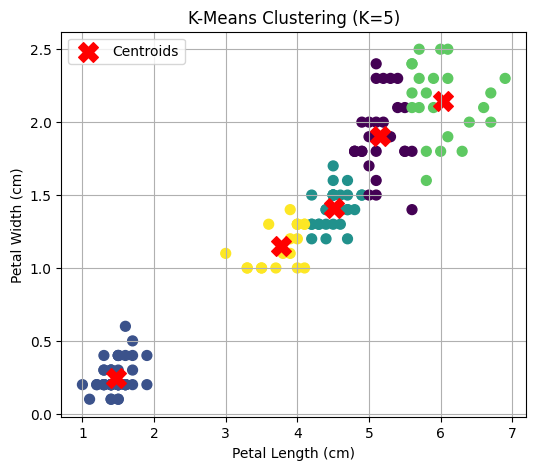

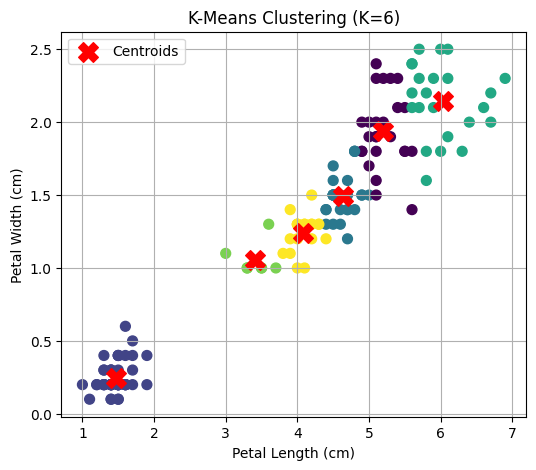

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


# Set the random seed
random_seed = 2782

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Use only petal length and petal width
X_vis = X[['petal length (cm)', 'petal width (cm)']]

# Plot cluster assignment for K = 2 to 6
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    cluster_labels = kmeans.fit_predict(X_vis)

    # Plot the clustering result
    plt.figure(figsize=(6, 5))
    plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=cluster_labels, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-Means Clustering (K={k})')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.legend()
    plt.grid(True)
    plt.show()


b. For each clustering create silhouette plots and print out the score. You can
make use of the sklearn library


--- K = 2 ---
Silhouette Score for k=2: 0.7654


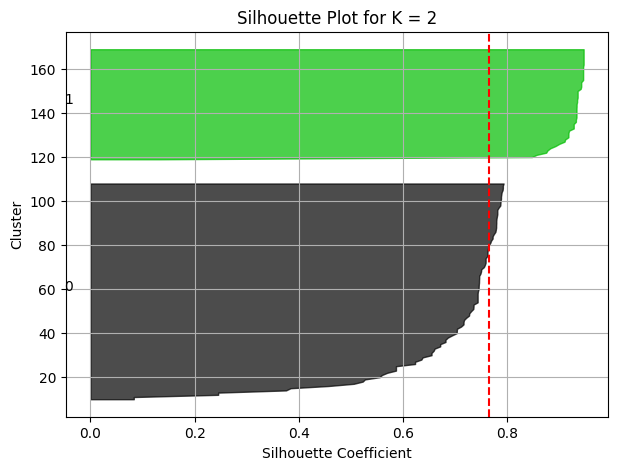


--- K = 3 ---
Silhouette Score for k=3: 0.6605


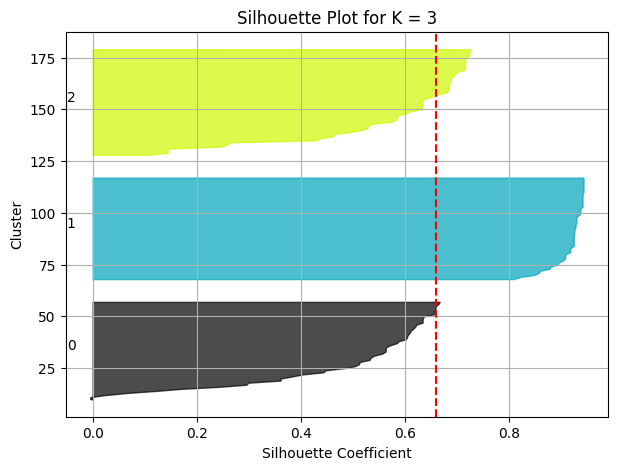


--- K = 4 ---
Silhouette Score for k=4: 0.6011


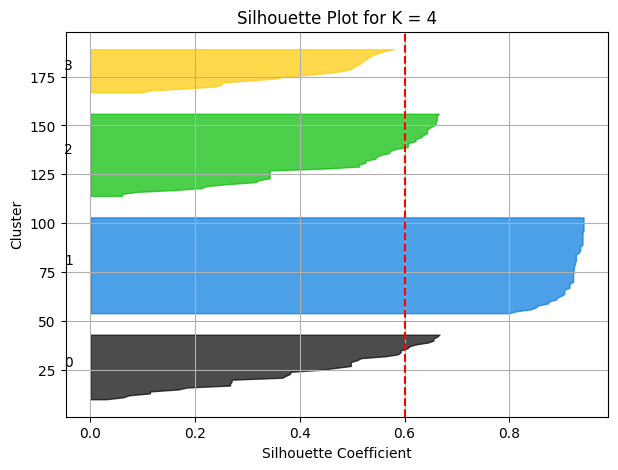


--- K = 5 ---
Silhouette Score for k=5: 0.5831


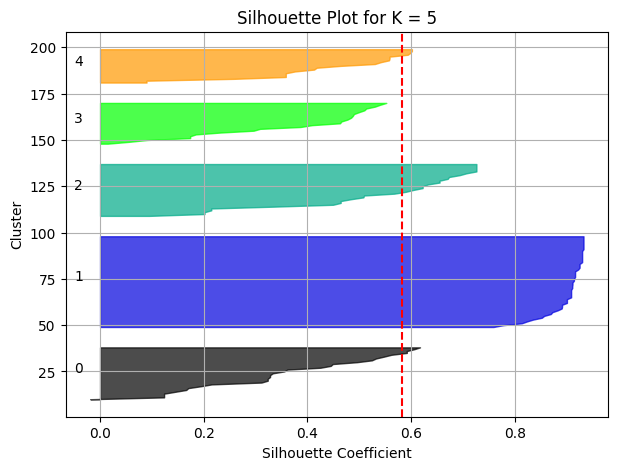


--- K = 6 ---
Silhouette Score for k=6: 0.5633


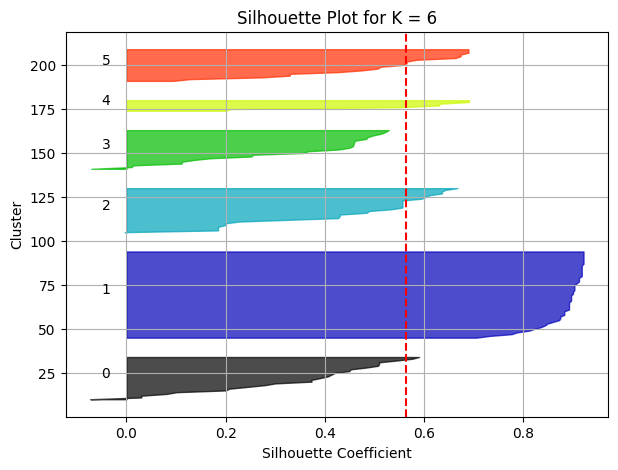

In [5]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Silhouette analysis for K = 2 to 6
for k in range(2, 7):
    print(f"\n--- K = {k} ---")

    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    cluster_labels = kmeans.fit_predict(X_vis)

    # Compute average silhouette score
    silhouette_avg = silhouette_score(X_vis, cluster_labels)
    print(f"Silhouette Score for k={k}: {silhouette_avg:.4f}")

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_vis, cluster_labels)

    # Create silhouette plot
    y_lower = 10
    plt.figure(figsize=(7, 5))
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(f"Silhouette Plot for K = {k}")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.grid(True)
    plt.show()


**2.**

In [10]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [4]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X = iris.data
petal_length, petal_width = X[:, 2], X[:, 3]

In [6]:
bic_scores = []
for k in range(2, 7):
    gmm = GaussianMixture(n_components=k, random_state=2782).fit(X)
    bic_scores.append(gmm.bic(X))
    print(f"K={k}, BIC: {bic_scores[-1]:.2f}")

optimal_k = np.argmin(bic_scores) + 2  # +2 since K starts at 2
print(f"Optimal K via BIC: {optimal_k}")

K=2, BIC: 574.02
K=3, BIC: 580.86
K=4, BIC: 625.44
K=5, BIC: 669.83
K=6, BIC: 728.99
Optimal K via BIC: 2


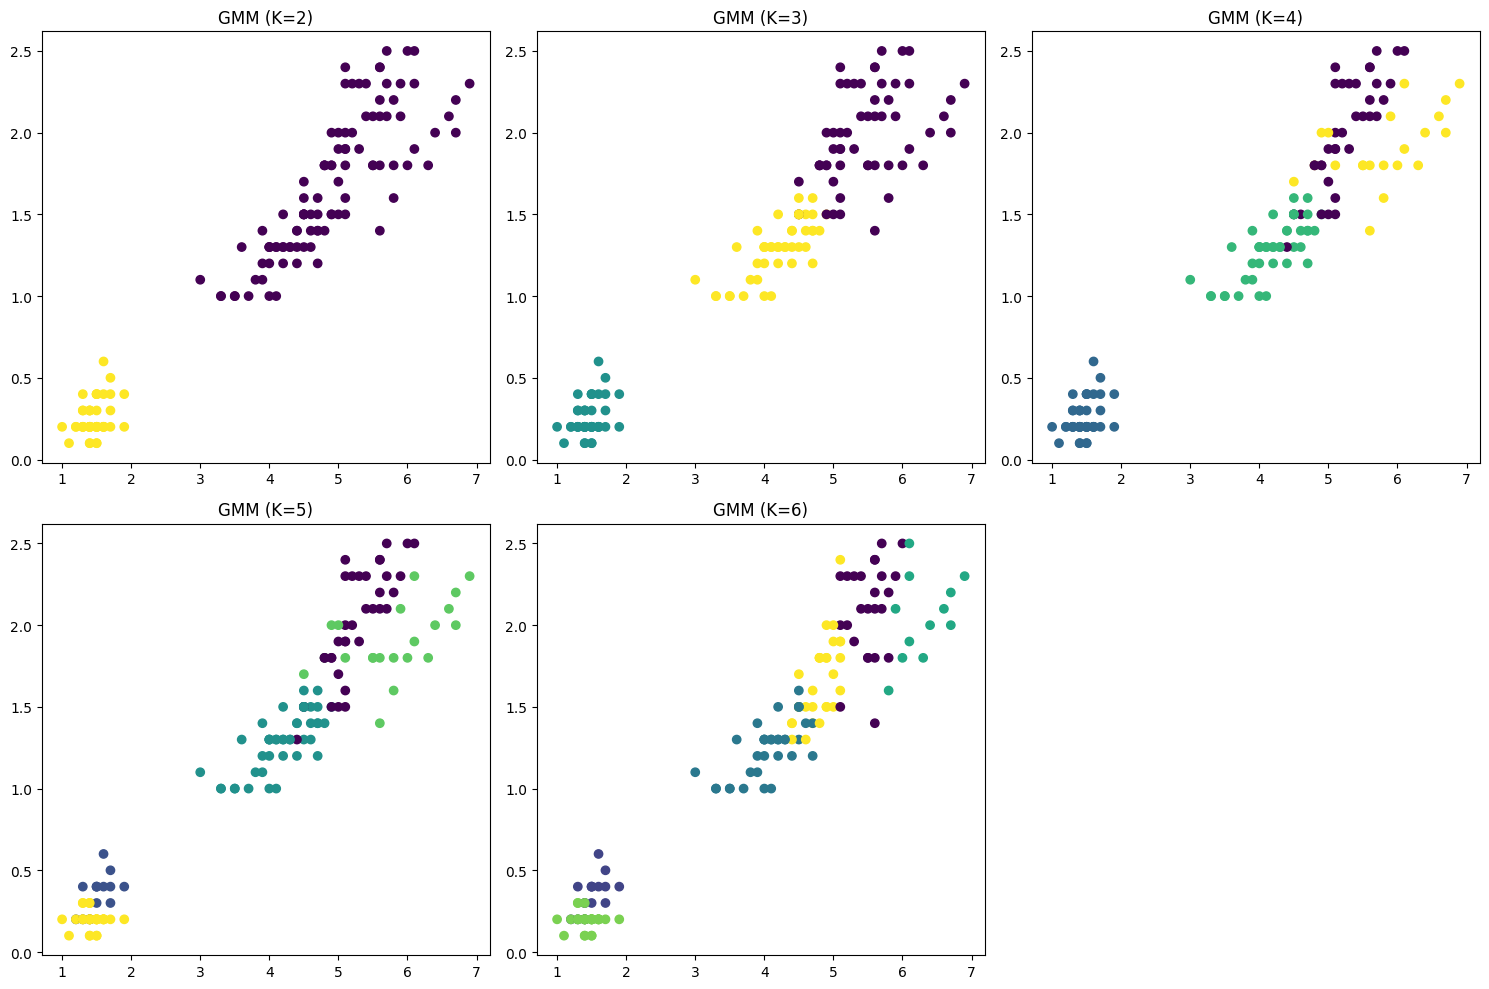

In [5]:
plt.figure(figsize=(15, 10))
for k in range(2, 7):
    gmm = GaussianMixture(n_components=k, random_state=2782).fit(X)
    labels = gmm.predict(X)
    plt.subplot(2, 3, k-1)
    plt.scatter(petal_length, petal_width, c=labels, cmap='viridis')
    plt.title(f'GMM (K={k})')
plt.tight_layout()
plt.show()

GMM (K=2), Silhouette Score: 0.687


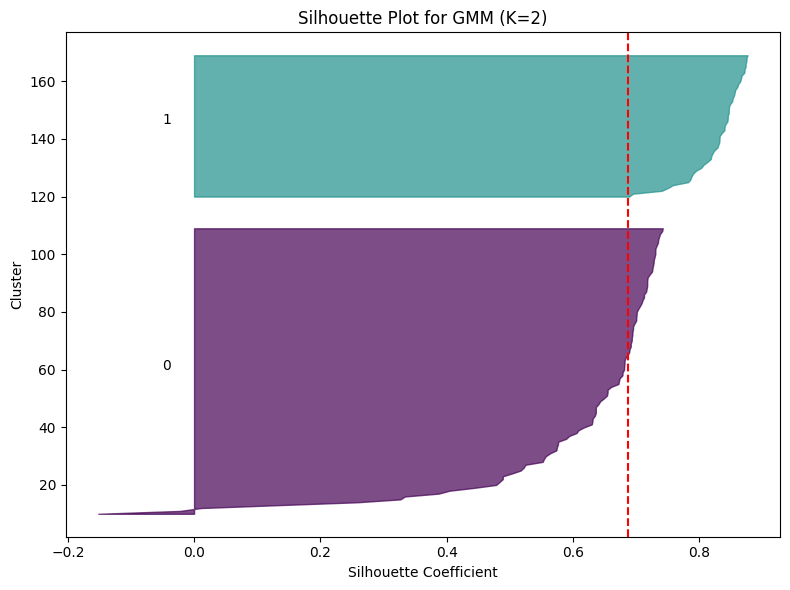

GMM (K=3), Silhouette Score: 0.501


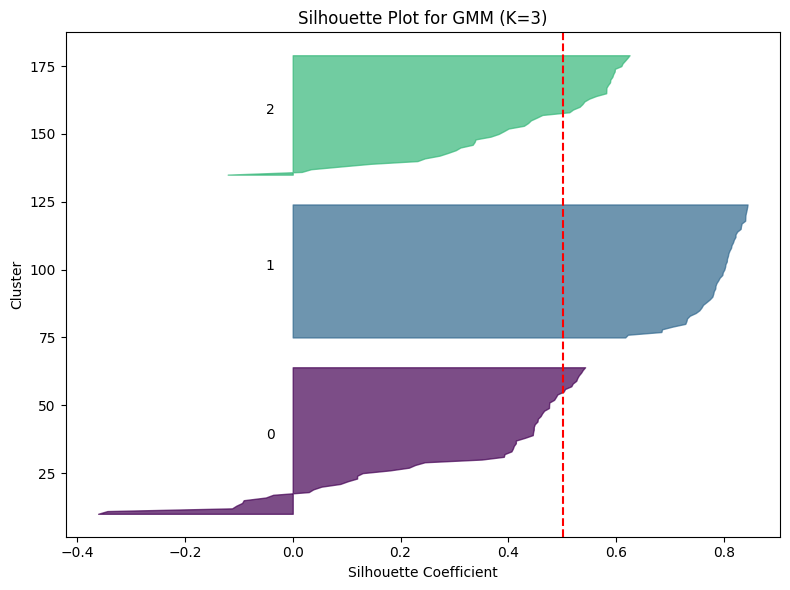

GMM (K=4), Silhouette Score: 0.405


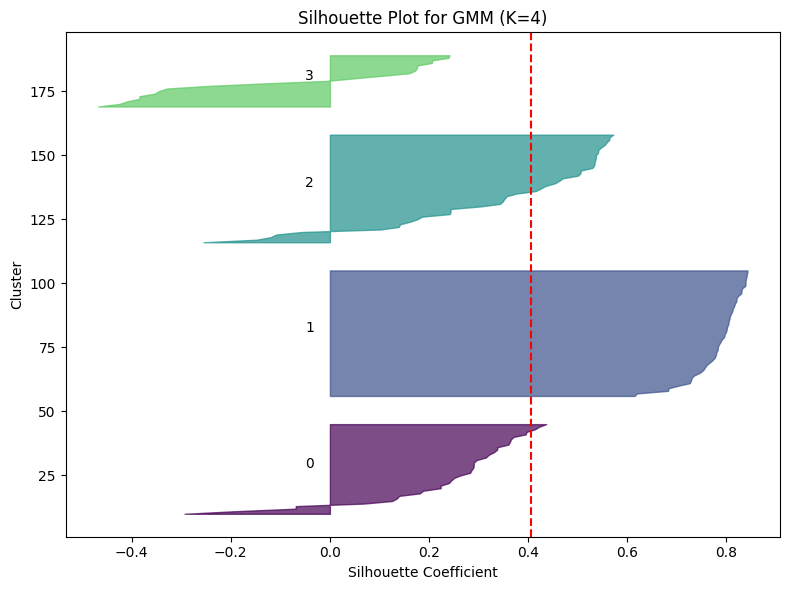

GMM (K=5), Silhouette Score: 0.231


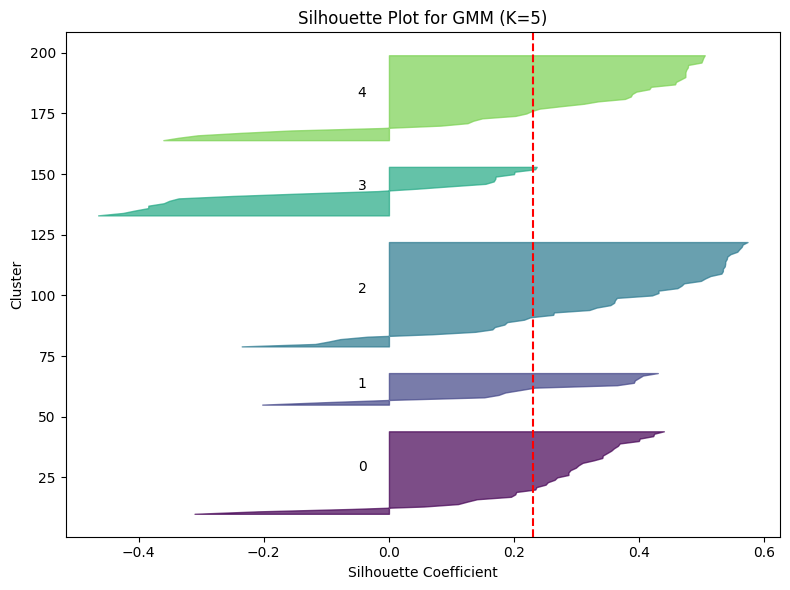

GMM (K=6), Silhouette Score: 0.278


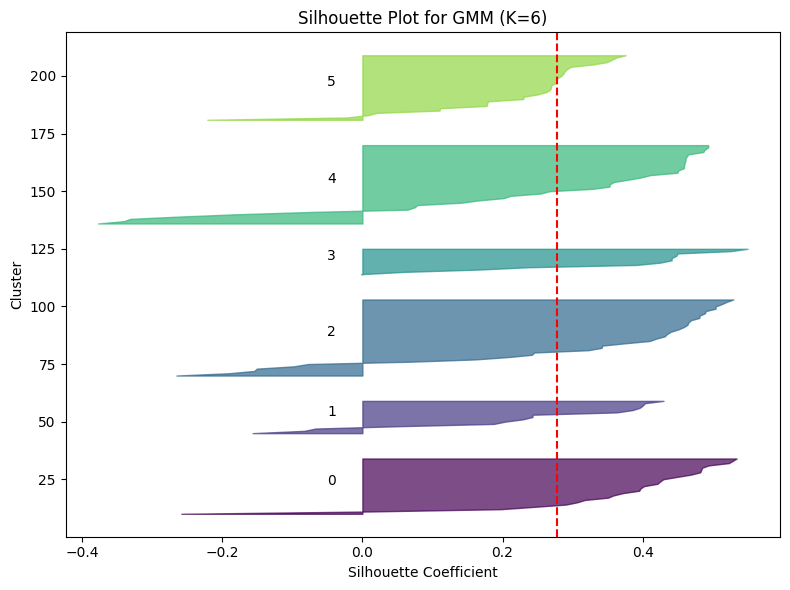

In [8]:
for k in range(2, 7):
    #Fit GMM
    gmm = GaussianMixture(n_components=k, random_state=2782)
    labels = gmm.fit_predict(X)
    
    #compute silhouette score
    silhouette_avg = silhouette_score(X, labels)
    print(f"GMM (K={k}), Silhouette Score: {silhouette_avg:.3f}")
    
    #create silhouette plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sample_silhouette_values = silhouette_samples(X, labels)
    y_lower = 10  
    
    for i in range(k):
        ith_cluster_silhouette = sample_silhouette_values[labels == i]
        ith_cluster_silhouette.sort()
        
        size_cluster_i = ith_cluster_silhouette.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.viridis(float(i) / k) 
        
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)
        
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # Add padding for next cluster
    
    ax.axvline(silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster")
    ax.set_title(f"Silhouette Plot for GMM (K={k})")
    plt.tight_layout()
    plt.show()

**3.**

- K-Means is effective for clusters that are spherical in shape and tends to yield higher silhouette scores for optimal values of K, typically around 2 or 3.

- On the other hand, Gaussian Mixture Models (GMM) can effectively handle elliptical clusters. BIC frequently suggests that the best number of clusters, K, is 3, which aligns with the actual number of species in the Iris dataset. 

- Overall, GMM with K=3 selected by BIC is the superior choice because of its ability to accommodate various cluster shapes.

**4.**

In [9]:
#a
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=2782)
X_pca = pca.fit_transform(X)

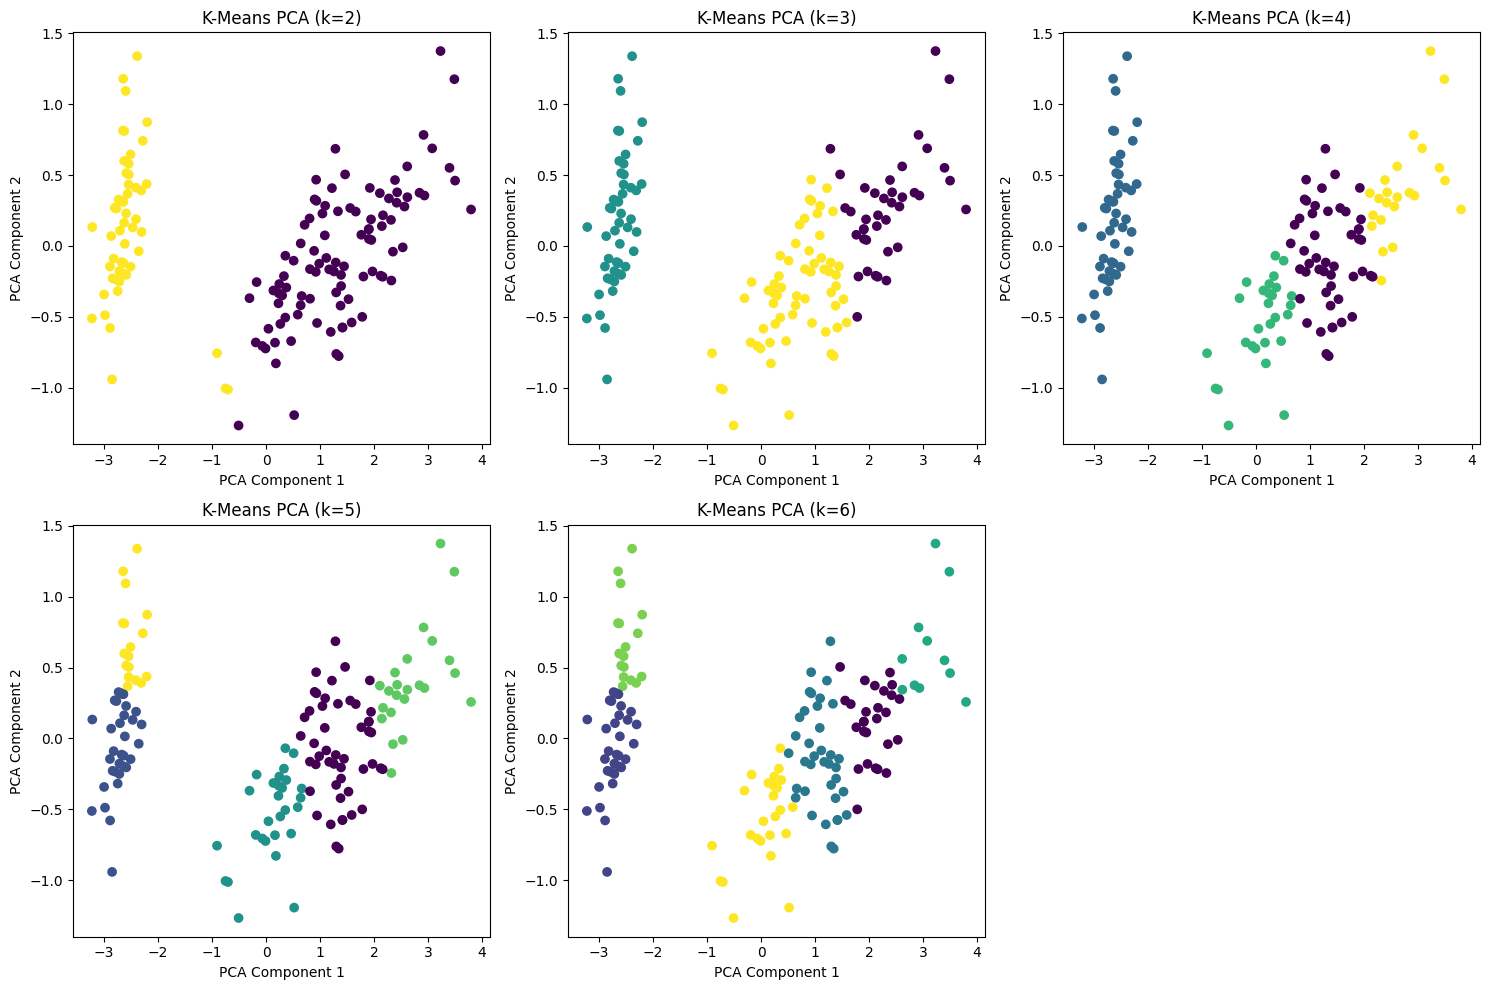

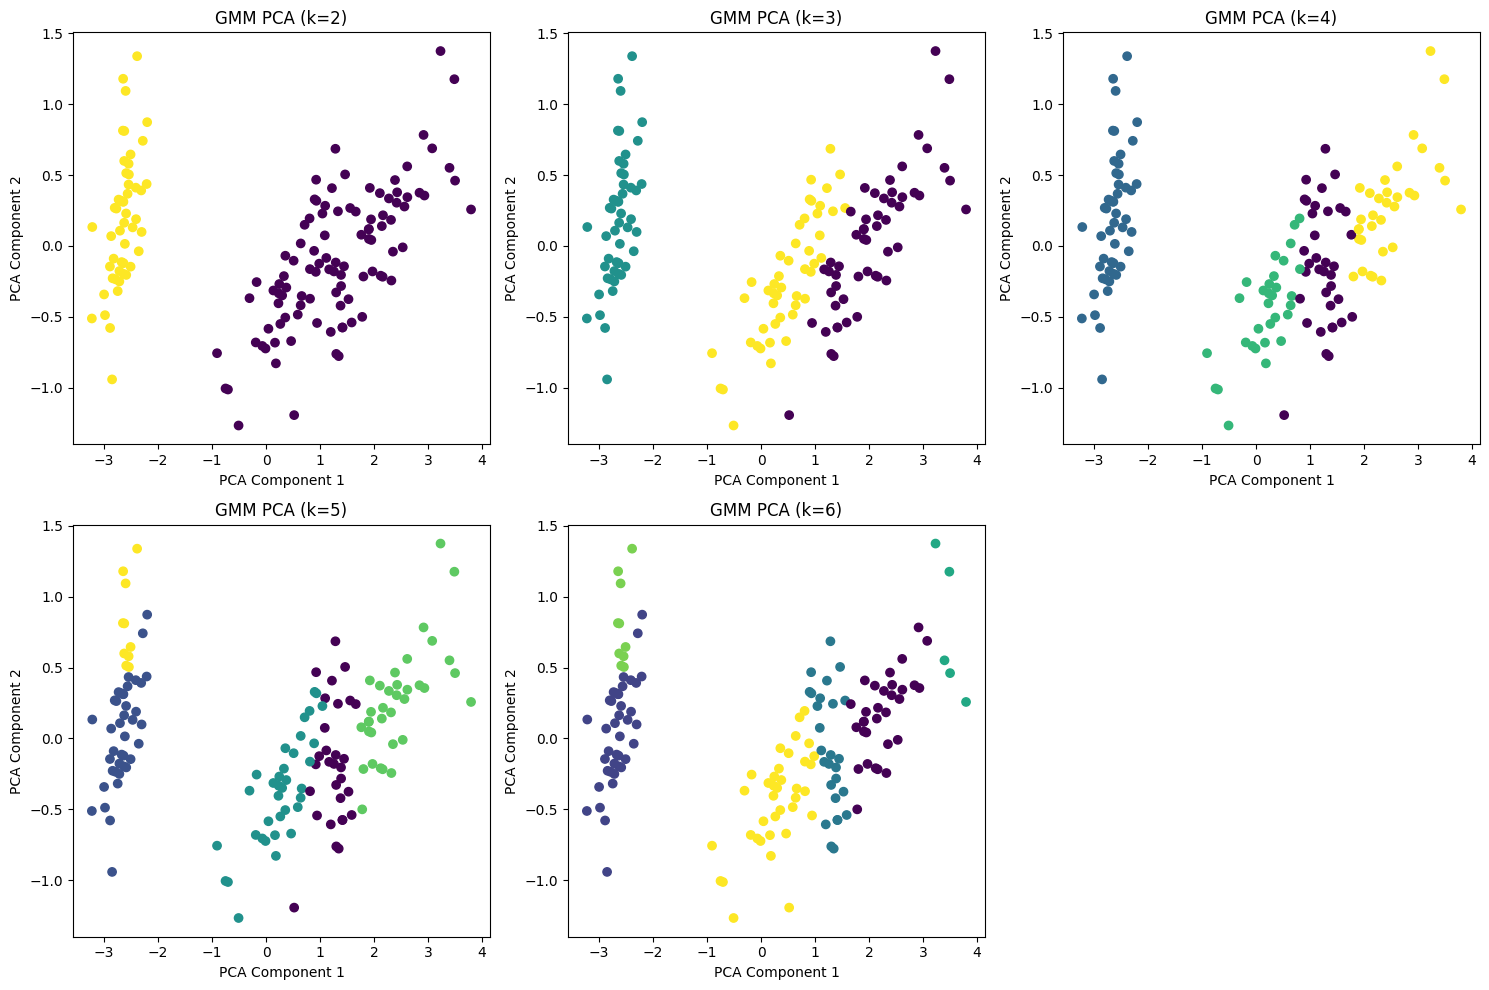

In [11]:
#b and c:

plt.figure(figsize=(15, 10))
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=2782)
    clusters = kmeans.fit_predict(X_pca)

    plt.subplot(2, 3, k-1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.title(f'K-Means PCA (k={k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))
for k in range(2, 7):
    gmm = GaussianMixture(n_components=k, random_state=2782)
    clusters = gmm.fit_predict(X_pca)
    
    plt.subplot(2, 3, k-1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.title(f'GMM PCA (k={k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

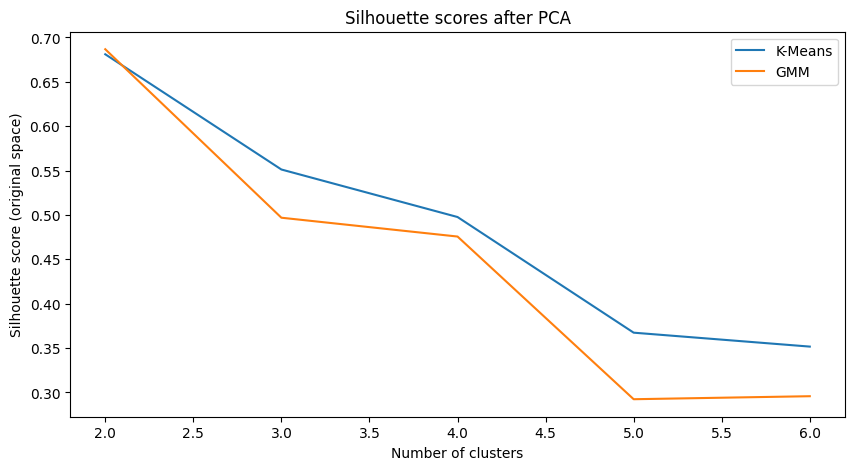

In [ ]:
kmeans_scores = []
gmm_scores = []

for k in range(2, 7):
    #K-Means
    kmeans = KMeans(n_clusters=k, random_state=2782)
    clusters = kmeans.fit_predict(X_pca)
    kmeans_scores.append(silhouette_score(X, clusters))
    
    #GMM
    gmm = GaussianMixture(n_components=k, random_state=2782)
    clusters = gmm.fit_predict(X_pca)
    gmm_scores.append(silhouette_score(X, clusters))

#Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 7), kmeans_scores, label='K-Means')
plt.plot(range(2, 7), gmm_scores, label='GMM')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score (original space)')
plt.title('Silhouette scores after PCA')
plt.legend()
plt.show()

- e)- PCA slightly degrades clustering performance (lower silhouette scores). This is because PCA removes some variance that may be useful for clustering". However, the difference is small and PCA can help with visualization.